##  Contents<a id='Contents'></a>
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load The Data](#Load_The_Data)
  * [Explore The Data](#Explore_The_Data)
  * [Visualizing Data](#Visualizing_Data)
      * [Word Frequency Analysis](#_Word_Frequency_Analysis)
      * [Sentence Length Analysis](#_Sentence_Length_Analysis)
      * [Average Word Length Analysis](#_Average_Word_Length_Analysis)
  * [Tokenization and Lemmatization](#_Tokenization_and_Lemmatization)
  * [Count Vectorizer](#_Count_Vectorizer_)
  * [Most Common Words](#_Most_Common_Words_)
  * [Least Common Words](#_Least_Common_Words_)
  * [Pentagrams](#Pentagrams)
  * [Summary](#_Summary)

## Introduction<a id='Introduction'></a>

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The result is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.

Sheet1.csv contains 80 user responses to a therapy chatbot. The prompt for the bot is: 'Describe a time when you have acted as a resource for someone else'. The user response is stored in the response_text column. If a response is 'not flagged', the user can continue talking to the bot. If it is 'flagged', the user is referred to help.

Sheet2.csv contains 125 data science resumes, stored in the resume_text column. Resumes were queried from Indeed.com with keyword 'data scientist', location 'Vermont'. If a resume is 'not flagged', the applicant can submit a modified resume version at a later date. If it is 'flagged', the applicant is invited to interview.

The purpose of the chatbot is to provide both an avenue for users to vent their feelings and to refer them to professional help. An incompetent classification system could result in emotional isolation and needless user suffering. The classification of the resumes for a ‘data scientist’ role is not as high stakes. This process can be thought of as ‘separating the wheat from the chaff’. Strong resumes are flagged and invited to interview.

## Imports<a id='Imports'></a>

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
os.chdir(r'C:\Users\daenj\OneDrive\Desktop\Datasets\Capstone 2 2021')

## Load the Data<a id='Load_the_Data'></a>

In [3]:
data = pd.read_csv('Sheet_1.csv', encoding='latin-1')


data = data.drop(["Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6","Unnamed: 7"], axis = 1)
data = data.rename(columns={"v1":"class", "v2":"Responses"})

data.head()

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [4]:
data["class"].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

In [5]:
data.describe()

,response_id,class,response_text
count,80,80,80
unique,80,2,80
top,response_50,not_flagged,I used to tutor homeless men at a shelter to h...
freq,1,55,1


In [6]:
data2 = pd.read_csv('Sheet_2.csv', encoding='latin-1')

data2 = data2.rename(columns={"v1":"class", "v2":"Resumes"})

data2.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [7]:
data2["class"].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [8]:
data2.describe()

,resume_id,class,resume_text
count,125,125,125
unique,125,2,125
top,resume_124,not_flagged,Victoria Copeland Senior Research Biologist\rB...
freq,1,92,1


There are no missing values in either dataset. Let's move on to EDA.

## Explore the Data<a id='Explore_the_Data'></a>

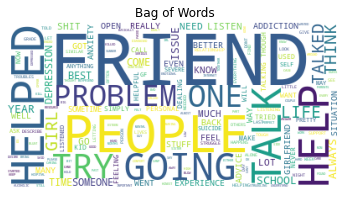

In [9]:
## Bag of response words

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud(dataframe):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Bag of Words")

wordcloud(data['response_text'])

The most popular words in chatbot responses are 'friend', 'people',  and 'helped'. 

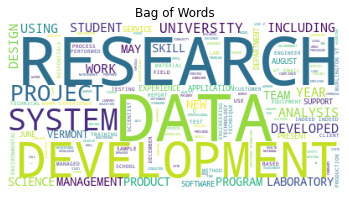

In [10]:
# Bag of resume words

wordcloud(data2['resume_text'])  

The most popular words in the data science resumes are 'research', 'data', and 'development'.

## Visualizing Data<a id='Visualizing_Data'></a>

## Word Frequency Analysis<a id='_Word_Frequency_Analysis'></a>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pd.set_option('display.max_columns', 100)

Text(0, 0.5, 'Count')

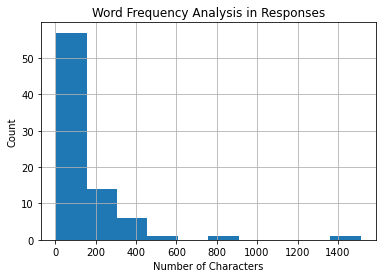

In [12]:
data['response_text'].str.len().hist()
plt.title('Word Frequency Analysis in Responses')
plt.xlabel('Number of Characters')
plt.ylabel('Count')

Most responses contain less than 200 words. There is one case where the response was greater than 1400 words.

Text(0, 0.5, 'Count')

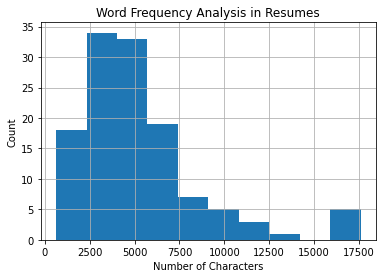

In [13]:
data2['resume_text'].str.len().hist()
plt.title('Word Frequency Analysis in Resumes')
plt.xlabel('Number of Characters')
plt.ylabel('Count')

Most resumes contain around 5000 words. There is one outlier with almost 17500 words!

## Sentence Length Analysis<a id='_Sentence_Length_Analysis'></a>

Text(0, 0.5, 'Count')

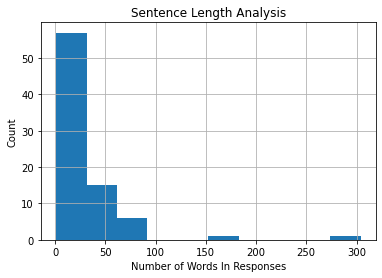

In [14]:
data['response_text'].str.split().\
    map(lambda x: len(x)).\
    hist()
plt.title('Sentence Length Analysis')
plt.xlabel('Number of Words In Responses')
plt.ylabel('Count')

Most chatbot responses contain around 25 words.

Text(0, 0.5, 'Count')

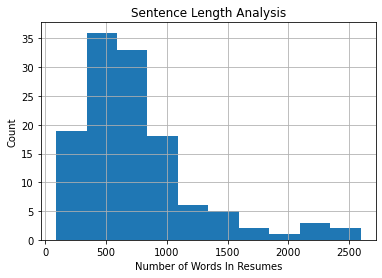

In [15]:
data2['resume_text'].str.split().\
    map(lambda x: len(x)).\
    hist()
plt.title('Sentence Length Analysis')
plt.xlabel('Number of Words In Resumes')
plt.ylabel('Count')

Most resumes contain around 500 - 750 words.

## Average Word Length Analysis<a id='_Average_Word_Length_Analysis'></a>

Text(0, 0.5, 'Count')

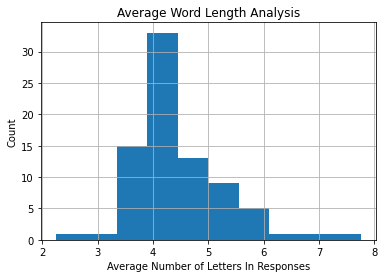

In [16]:
data['response_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.title('Average Word Length Analysis')
plt.xlabel('Average Number of Letters In Responses')
plt.ylabel('Count')

The average word in chatbot responses contain 4 letters. These 4 letter words occured most frequently.

Text(0, 0.5, 'Count')

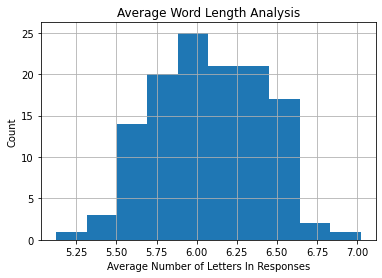

In [17]:
data2['resume_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.title('Average Word Length Analysis')
plt.xlabel('Average Number of Letters In Responses')
plt.ylabel('Count')

The average word length in the resume text contains 6 letters.

## Tokenization and Lemmitization<a id='_Tokenization_and_Lemmitization'></a>

In [18]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [19]:
data.response_text[10]

'Took a week off work, packed up the car and picked up a friend who was on the verge of losing it and went camping/surfing for a week. His parents were a big part of the problem and being away from them and others and physical activity every day for a week. but more just being around helped i feel.'

In [20]:
import re
import nltk
first_text = data.response_text[10]
text = re.sub("[^a-zA-Z]"," ",first_text)
text = text.lower() 
print(text)

took a week off work  packed up the car and picked up a friend who was on the verge of losing it and went camping surfing for a week  his parents were a big part of the problem and being away from them and others and physical activity every day for a week  but more just being around helped i feel 


Removing punctuation and converting text to lower case for consistency.

In [21]:
nltk.download("stopwords")     

text = nltk.word_tokenize(text)

text = [ word for word in text if not word in set(stopwords.words("english"))]
print(text)

['took', 'week', 'work', 'packed', 'car', 'picked', 'friend', 'verge', 'losing', 'went', 'camping', 'surfing', 'week', 'parents', 'big', 'part', 'problem', 'away', 'others', 'physical', 'activity', 'every', 'day', 'week', 'around', 'helped', 'feel']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daenj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
import nltk as nlp
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
text = [(lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a")) for word in text]
print(text)

['take', 'week', 'work', 'pack', 'car', 'pick', 'friend', 'verge', 'lose', 'go', 'camp', 'surf', 'week', 'parent', 'big', 'part', 'problem', 'away', 'others', 'physical', 'activity', 'every', 'day', 'week', 'around', 'help', 'feel']


The same process as above will be repeated for the resume data.

In [23]:
data2 = pd.read_csv("Sheet_2.csv",encoding= "latin1" )

In [24]:
data2.head(10)

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
5,resume_6,not_flagged,\rPoultney VT - Email me on Indeed: indeed.com...
6,resume_7,not_flagged,\rMedical Laboratory Scientist (Special Chemis...
7,resume_8,flagged,Statistician\rBurlington VT - Email me on Inde...
8,resume_9,not_flagged,Research technician\rBurlington VT - Email me ...
9,resume_10,not_flagged,Barbara Hennessey-Elzohairy\rNewport VT - Emai...


In [25]:
first_text = data2.resume_text[10]
text = re.sub("[^a-zA-Z]"," ",first_text)
text = text.lower() 

In [26]:
nltk.download("stopwords")     

text = nltk.word_tokenize(text)

text = [ word for word in text if not word in set(stopwords.words("english"))]
print(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daenj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['barbara', 'kurth', 'research', 'assistant', 'professor', 'clinical', 'research', 'navigation', 'tulane', 'university', 'health', 'sciences', 'center', 'louisiana', 'state', 'university', 'charlotte', 'vt', 'email', 'indeed', 'indeed', 'com', 'r', 'barbara', 'kurth', 'f', 'e', 'f', 'fab', 'work', 'experience', 'research', 'assistant', 'professor', 'clinical', 'research', 'navigation', 'tulane', 'university', 'health', 'sciences', 'center', 'louisiana', 'state', 'university', 'new', 'orleans', 'la', 'present', 'health', 'sciences', 'center', 'new', 'orleans', 'la', 'research', 'assistant', 'professor', 'clinical', 'research', 'navigation', 'provide', 'regulatory', 'expertise', 'advice', 'administration', 'medical', 'faculty', 'staff', 'ensure', 'clinical', 'research', 'protocols', 'meet', 'institutional', 'governmental', 'regulations', 'inception', 'approval', 'services', 'include', 'advising', 'assisting', 'investigators', 'drafting', 'generation', 'research', 'protocols', 'using', 'i

In [27]:
import nltk as nlp
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
text = [(lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a")) for word in text]
print(text)

['barbara', 'kurth', 'research', 'assistant', 'professor', 'clinical', 'research', 'navigation', 'tulane', 'university', 'health', 'science', 'center', 'louisiana', 'state', 'university', 'charlotte', 'vt', 'email', 'indeed', 'indeed', 'com', 'r', 'barbara', 'kurth', 'f', 'e', 'f', 'fab', 'work', 'experience', 'research', 'assistant', 'professor', 'clinical', 'research', 'navigation', 'tulane', 'university', 'health', 'science', 'center', 'louisiana', 'state', 'university', 'new', 'orleans', 'la', 'present', 'health', 'science', 'center', 'new', 'orleans', 'la', 'research', 'assistant', 'professor', 'clinical', 'research', 'navigation', 'provide', 'regulatory', 'expertise', 'advice', 'administration', 'medical', 'faculty', 'staff', 'ensure', 'clinical', 'research', 'protocol', 'meet', 'institutional', 'governmental', 'regulation', 'inception', 'approval', 'service', 'include', 'advise', 'assist', 'investigator', 'draft', 'generation', 'research', 'protocol', 'use', 'ich', 'gcp', 'guide

## Count Vectorizer<a id='_Count_Vectorizer'></a>

In [28]:
description_list = []
for description in data.response_text:
    
    
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower() 
    
    description = nltk.word_tokenize(description)
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    
    lemmatizer = WordNetLemmatizer()
    description = (lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a") for word in description)
    
    description = " ".join(description)
    description_list.append(description)

In [29]:
description_list[10]

'take week work pack car pick friend verge lose go camp surf week parent big part problem away others physical activity every day week around help feel'

In [30]:
max_features = 50

In [31]:
count_vectorizer = CountVectorizer(max_features=max_features)

In [32]:
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()

In [33]:
print("Top {} Most Used Words: {}".format(max_features,count_vectorizer.get_feature_names()))

Top 50 Most Used Words: ['addiction', 'advice', 'always', 'best', 'call', 'come', 'deal', 'depression', 'even', 'experience', 'feel', 'find', 'friend', 'get', 'girl', 'girlfriend', 'give', 'go', 'good', 'help', 'issue', 'know', 'let', 'life', 'listen', 'lot', 'make', 'many', 'much', 'need', 'one', 'open', 'people', 'problem', 'school', 'shit', 'situation', 'someone', 'struggle', 'stuff', 'talk', 'tell', 'think', 'time', 'try', 'want', 'way', 'well', 'would', 'year']


In [34]:
description_list = []
for description in data2.resume_text:
    
    
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower() 
    
    description = nltk.word_tokenize(description)
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    
    lemmatizer = WordNetLemmatizer()
    description = (lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a") for word in description)
    
    description = " ".join(description)
    description_list.append(description)

In [35]:
description_list[10]

'barbara kurth research assistant professor clinical research navigation tulane university health science center louisiana state university charlotte vt email indeed indeed com r barbara kurth f e f fab work experience research assistant professor clinical research navigation tulane university health science center louisiana state university new orleans la present health science center new orleans la research assistant professor clinical research navigation provide regulatory expertise advice administration medical faculty staff ensure clinical research protocol meet institutional governmental regulation inception approval service include advise assist investigator draft generation research protocol use ich gcp guideline ensure appropriate input biostatisticians bioinformaticists intellectual property officer contract officer clinical research proposal guide researcher oversight inform consent study use irb guideline guide researcher process necessary paperwork activate investigator in

In [36]:
max_features = 50

In [37]:
count_vectorizer = CountVectorizer(max_features=max_features)

In [38]:
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()

In [39]:
print("Top {} Most Used Words: {}".format(max_features,count_vectorizer.get_feature_names()))

Top 50 Most Used Words: ['analysis', 'assistant', 'august', 'college', 'com', 'data', 'design', 'develop', 'development', 'education', 'engineer', 'environmental', 'experience', 'include', 'indeed', 'information', 'june', 'laboratory', 'maintain', 'manage', 'management', 'may', 'new', 'present', 'process', 'product', 'program', 'project', 'provide', 'quality', 'report', 'research', 'science', 'scientist', 'service', 'skill', 'software', 'state', 'student', 'support', 'system', 'team', 'test', 'train', 'university', 'use', 'vermont', 'vt', 'work', 'year']


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
train_df = data.sample(frac = 1, axis=0)  
train_df_mat = vect.fit_transform(train_df['response_text'])
print(train_df_mat.shape) 

print(vect.get_feature_names())

print(len(vect.get_feature_names()))

(80, 660)
['1n', '50', 'able', 'about', 'above', 'absolutely', 'acquaintances', 'acted', 'actions', 'activity', 'addiction', 'adequate', 'admit', 'advice', 'advise', 'after', 'age', 'ago', 'agony', 'alcoholic', 'all', 'allowed', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'an', 'and', 'anniversary', 'another', 'answer', 'answers', 'anxiety', 'anxious', 'any', 'anyone', 'anything', 'anyway', 'apposed', 'are', 'aren', 'around', 'as', 'ask', 'asks', 'at', 'attention', 'aunt', 'avoid', 'away', 'back', 'bad', 'basically', 'be', 'because', 'bedroom', 'been', 'before', 'being', 'best', 'better', 'big', 'bit', 'blow', 'blows', 'blue', 'blunt', 'book', 'both', 'boyfriend', 'break', 'bring', 'brother', 'brought', 'bunch', 'but', 'by', 'call', 'called', 'calling', 'calls', 'calm', 'came', 'camp', 'camping', 'campsite', 'can', 'cancer', 'cant', 'car', 'care', 'caring', 'categories', 'caught', 'cause', 'chance', 'change', 'changed', 'chat', 'circumstances', 'clean', '

There are 660 unique words in chatbot responses.

In [41]:
# CountVectorizer significantly decreases the number of words (down from ~17k to ~11k).
vect2 = CountVectorizer()
train_df2 = data2.sample(frac = 1, axis=0) 
df2_mat = vect2.fit_transform(train_df2['resume_text'])
print(df2_mat.shape)  

(125, 11466)


Here we see CountVectorizer finds 11466 unique words in the resume text.

## Most Common Words <a id='_Most_Common_Words'></a>

In [42]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words("english")
stopwords = set(stop_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daenj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\daenj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
corpus = []
bot_resp = data['response_text'].str.split()
bot_resp = bot_resp.values.tolist()
corpus = [word for i in bot_resp for word in i]

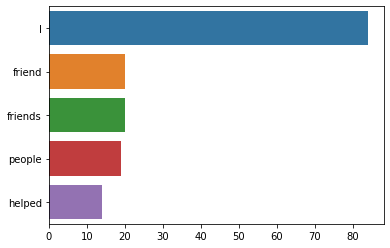

In [44]:
counter_bot=Counter(corpus)
most=counter_bot.most_common()

x, y= [], []
for word,count in most[:30]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

These are the most common words in chatbot responses.

In [45]:
corpus = []
res_text = data2["resume_text"].str.split()
res_text = res_text.values.tolist()
corpus=[word for i in res_text for word in i]

C:\Users\daenj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daenj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daenj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daenj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)


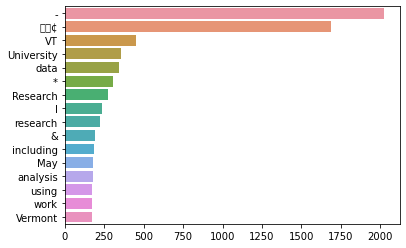

In [46]:
counter_res=Counter(corpus)
most=counter_res.most_common()

x, y= [], []
for word,count in most[:30]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

'VT', 'university', and 'data' are the three most common words in resumes.

## Least Common Words <a id='_Least_Common_Words'></a>

In [47]:
from operator import itemgetter
import heapq
import collections
def least_common_values(array, to_find=None):
    counter = collections.Counter(array)
    if to_find is None:
        return sorted(counter.items(), key=itemgetter(1), reverse=False)
    return heapq.nsmallest(to_find, counter.items(), key=itemgetter(1))

In [48]:
least_common_values(counter_bot, 25)

[('avoid', 1),
 ('sort', 1),
 ('conflict', 1),
 ('Had', 1),
 ('weed', 1),
 ('taking', 1),
 ('depressed', 1),
 ('saved', 1),
 ('suicide', 1),
 ('once.', 1),
 ('swallow', 1),
 ('bunch', 1),
 ('pills', 1),
 ('calm,', 1),
 ('loving', 1),
 ('way.', 1),
 ('really...i', 1),
 ('indirectly', 1),
 ('Only', 1),
 ('fit', 1),
 ('above', 1),
 ('categories.', 1),
 ('Her', 1),
 ('therapist', 1),
 ('spiraling."', 1)]

The 25 least common words used in chatbot responses.

In [49]:
least_common_values(counter_res, 25)

[('indeed.com/r//49f8c9aecf490d26', 1),
 ('Service/Visual', 1),
 ('Up', 1),
 ('Display/Website', 1),
 ('upset', 1),
 ('issues:', 1),
 ('transit', 1),
 ('escalated', 1),
 ('placing', 1),
 ('cross-selling/upselling', 1),
 ('pick-up', 1),
 ('clean-up:', 1),
 ('proofreading', 1),
 ('/Events', 1),
 ('Coordinator/Office', 1),
 ('travel/logistics', 1),
 ('interior', 1),
 ('walk-thru', 1),
 ('calendars', 1),
 ('require', 1),
 ('Officer/Owner', 1),
 ('Temp', 1),
 ('Assignment', 1),
 ('OrthoNet', 1),
 ('Assistant/Receptionist', 1)]

The 25 least common used words in resumes.

## Pentagrams<a id='Pentagrams'></a>

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

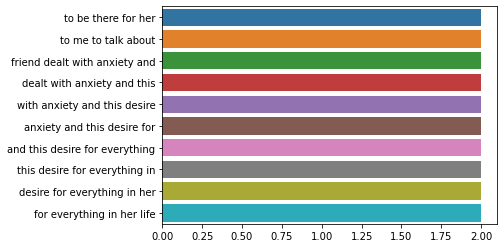

In [51]:
plot_top_ngrams_barchart(data['response_text'],5)

The pentagrams for the chatbot responses paints a clear picture into how people responded to the prompt. Being there for someone and dealing with anxiety are the main themes.

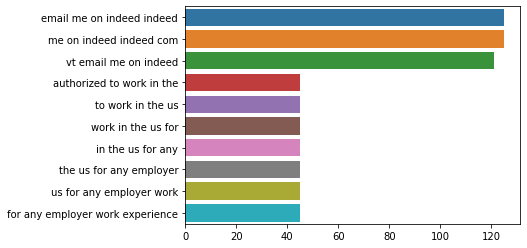

In [52]:
plot_top_ngrams_barchart(data2['resume_text'],5)

The resume pentagrams are identical. 5 word phrases in resumes pertain to working and invitations to email via indeed.com

## Summary<a id='_Summary'></a>

These datasets did not contain any missing values so not much cleaning was required. Word frequency, sentence length, and average word length were visualized for both datasets using histograms. The top words in both sets were visualized, as well as the top 5-word phrases. CountVectorizer was used to determine how many unique words were present. The vectorizer was also used to determine the top 50 words in both chatbot responses and resumes.